In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mall customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Hit Map

In [4]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


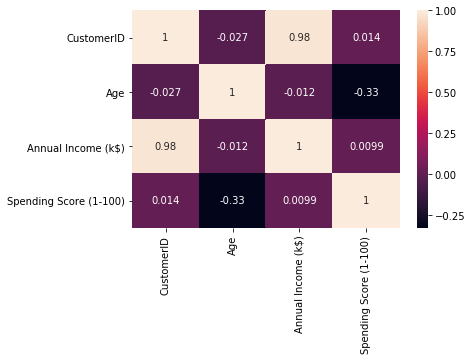

In [5]:
sns.heatmap(df.corr(), annot=True)

In [6]:
df.shape

(200, 5)

In [7]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


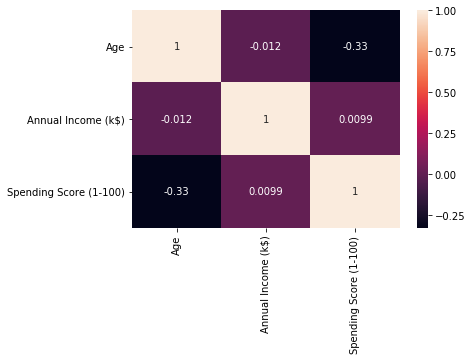

In [9]:
sns.heatmap(df.corr(), annot=True)

# Renaming column name

In [10]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
df.rename(columns={'Spending Score (1-100)':'Score','Annual Income (k$)':'Income'},inplace=True)

In [12]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:
df.to_csv('new.csv')

# Visualization

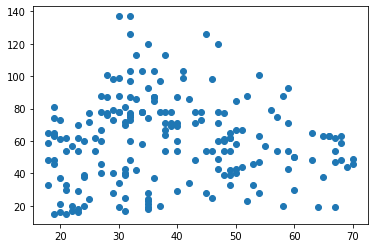

In [14]:
plt.scatter(df['Age'],df['Income'])

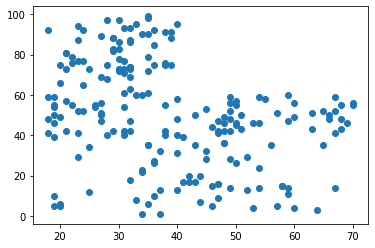

In [15]:
plt.scatter(df['Age'],df['Score'])

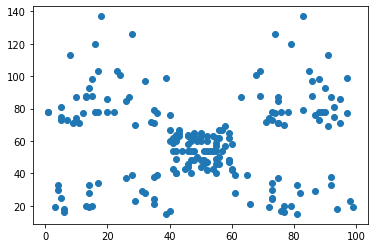

In [16]:
plt.scatter(df['Score'],df['Income'])

# Pairplot

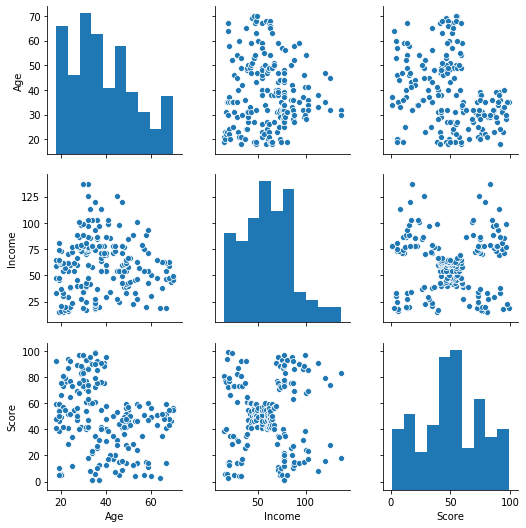

In [17]:
sns.pairplot(df[['Age','Income','Score']])

# KMeans Cluster

In [18]:
import sklearn.cluster as cluster

In [19]:
kmeans = cluster.KMeans()

In [20]:
kmeans.fit(df[['Income','Score']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
kmeans.cluster_centers_

array([[ 43.96969697,  51.12121212],
       [ 78.03571429,  81.89285714],
       [109.7       ,  22.        ],
       [ 24.95      ,  81.        ],
       [ 79.70833333,  14.29166667],
       [108.18181818,  82.72727273],
       [ 25.14285714,  19.52380952],
       [ 61.30188679,  48.24528302]])

In [22]:
df['clusters'] = kmeans.predict(df[['Income','Score']])

In [23]:
df.head()

,Gender,Age,Income,Score,clusters
0,Male,19,15,39,6
1,Male,21,15,81,3
2,Female,20,16,6,6
3,Female,23,16,77,3
4,Female,31,17,40,6


In [24]:
#kmeans.fit_predict(df[['Income','Score']])

# Smart visualization

In [26]:
df0 = df[df.clusters == 0]
df1 = df[df.clusters == 1]
df2 = df[df.clusters == 2]
df3 = df[df.clusters == 3]
df4 = df[df.clusters == 4]
df5 = df[df.clusters == 5]
df6 = df[df.clusters == 6]
df7 = df[df.clusters == 7]

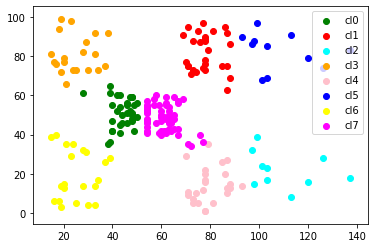

In [38]:
plt.scatter(df0['Income'],df0['Score'],color='green',label='cl0')
plt.scatter(df1['Income'],df1['Score'],color='red',label='cl1')
plt.scatter(df2['Income'],df2['Score'],color='cyan',label='cl2')
plt.scatter(df3['Income'],df3['Score'],color='orange',label='cl3')
plt.scatter(df4['Income'],df4['Score'],color='pink',label='cl4')
plt.scatter(df5['Income'],df5['Score'],color='blue',label='cl5')
plt.scatter(df6['Income'],df6['Score'],color='yellow',label='cl6')
plt.scatter(df7['Income'],df7['Score'],color='magenta',label='cl7')


plt.legend()

In [46]:
centers1 = kmeans.cluster_centers_

In [47]:
centers1

array([[ 43.96969697,  51.12121212],
       [ 78.03571429,  81.89285714],
       [109.7       ,  22.        ],
       [ 24.95      ,  81.        ],
       [ 79.70833333,  14.29166667],
       [108.18181818,  82.72727273],
       [ 25.14285714,  19.52380952],
       [ 61.30188679,  48.24528302]])

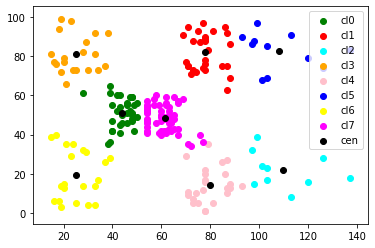

In [52]:
plt.scatter(df0['Income'],df0['Score'],color='green',label='cl0')
plt.scatter(df1['Income'],df1['Score'],color='red',label='cl1')
plt.scatter(df2['Income'],df2['Score'],color='cyan',label='cl2')
plt.scatter(df3['Income'],df3['Score'],color='orange',label='cl3')
plt.scatter(df4['Income'],df4['Score'],color='pink',label='cl4')
plt.scatter(df5['Income'],df5['Score'],color='blue',label='cl5')
plt.scatter(df6['Income'],df6['Score'],color='yellow',label='cl6')
plt.scatter(df7['Income'],df7['Score'],color='magenta',label='cl7')

plt.scatter(centers1[:,0] ,centers1[:,1], color='black',label='cen')

plt.legend()

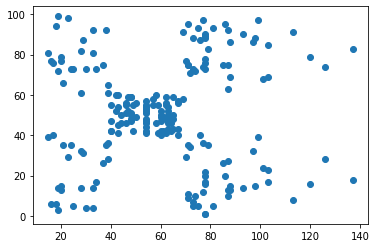

In [53]:
plt.scatter(df['Income'],df['Score'])

# Select optimal number of clusters
elbow method

In [57]:
from sklearn.cluster import KMeans
wcss = []
cluster = range(1,15)
for k in cluster:
    kmeans2 = KMeans(n_clusters=k)
    kmeans2.fit(df[['Income','Score']])
    wcss.append(kmeans2.inertia_)

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

In [58]:
wcss

[269981.28,
 182440.3076298701,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 31280.90384594093,
 25011.83934915659,
 21826.936303231654,
 19787.670554966855,
 18055.79272458807,
 16020.5089719804,
 14321.881821120056,
 13148.675093765884]

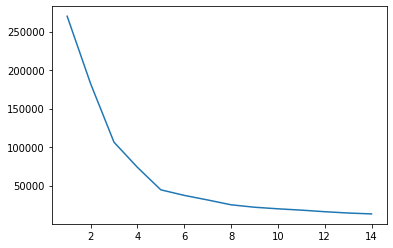

In [59]:
plt.plot(cluster,wcss)

In [60]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [61]:
from kneed import KneeLocator

In [64]:
kn = KneeLocator(cluster,wcss, curve='convex', direction='decreasing')

In [66]:
kn.knee

5

In [67]:
print("Optimal number of clusters = ", kn.knee)

Optimal number of clusters =  5


In [68]:
df.head()

,Gender,Age,Income,Score,clusters
0,Male,19,15,39,6
1,Male,21,15,81,3
2,Female,20,16,6,6
3,Female,23,16,77,3
4,Female,31,17,40,6


# After tuning

In [77]:
import sklearn.cluster as cls
kmeans3 = cls.KMeans(n_clusters=5)

In [84]:
new_df = df.copy()

In [85]:
new_df['clusters'] = kmeans3.fit_predict(new_df[['Income','Score']])

In [86]:
new_df.head()

,Gender,Age,Income,Score,clusters
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,2
4,Female,31,17,40,3


In [93]:
centers2 = kmeans3.cluster_centers_

In [91]:
df0 = df[new_df.clusters == 0]
df1 = df[new_df.clusters == 1]
df2 = df[new_df.clusters == 2]
df3 = df[new_df.clusters == 3]
df4 = df[new_df.clusters == 4]

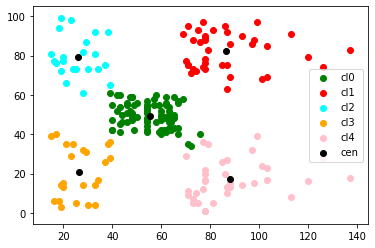

In [94]:
plt.scatter(df0['Income'],df0['Score'],color='green',label='cl0')
plt.scatter(df1['Income'],df1['Score'],color='red',label='cl1')
plt.scatter(df2['Income'],df2['Score'],color='cyan',label='cl2')
plt.scatter(df3['Income'],df3['Score'],color='orange',label='cl3')
plt.scatter(df4['Income'],df4['Score'],color='pink',label='cl4')

plt.scatter(centers2[:,0] ,centers2[:,1], color='black',label='cen')

plt.legend()